### Importing necessary packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

# 1.Data Preparation

### 1.1 Get Data

In [2]:
rt = pd.read_csv("Retail Transactions.csv") #reading csv file using pandas library.

In [3]:
rt.head() # fetching top 5 values from the files 

,transaction_date,transaction_hour,location_state,location_city,rewards_number,rewards_member,num_of_items,coupon_flag,discount_amt,order_amt
0,6/24/2020,1:26 PM,Florida,Miami,223-472-61,True,22,NaN,NaN,$213.68
1,5/15/2020,2:11 PM,South Carolina,Greenville,NaN,NaN,13,Yes,0.33,$155.59
2,2/20/2020,12:33 PM,Georgia,Atlanta,204-941-15,True,22,NaN,NaN,$106.82
3,7/22/2020,4:56 PM,Florida,Sarasota,446-940-80,True,17,Yes,0.25,$169.14
4,1/31/2020,7:53 PM,Florida,Pensacola,NaN,NaN,8,NaN,NaN,$72.93


In [4]:
rt.info() #fetching information about Retail Transaction file with columns names, non-null count, dtypes, size etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75620 entries, 0 to 75619
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_date  75620 non-null  object 
 1   transaction_hour  75620 non-null  object 
 2   location_state    75620 non-null  object 
 3   location_city     75620 non-null  object 
 4   rewards_number    43923 non-null  object 
 5   rewards_member    43923 non-null  object 
 6   num_of_items      75620 non-null  int64  
 7   coupon_flag       20942 non-null  object 
 8   discount_amt      20942 non-null  float64
 9   order_amt         75620 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 5.8+ MB


In [5]:
rt.columns #all columns names

Index(['transaction_date', 'transaction_hour', 'location_state',
       'location_city', 'rewards_number', 'rewards_member', 'num_of_items',
       'coupon_flag', 'discount_amt', 'order_amt'],
      dtype='object')

### 1.2 Converting data types 

In [6]:
# converting 'transaction_date' and 'transaction_hour' to datetime datatype
rt['transaction_date']= pd.to_datetime(rt['transaction_date'])


In [7]:
#removing dollar symbol from 'order_amt' and converting to float
rt['order_amt']= rt['order_amt'].replace('[\$,]',' ',regex=True).astype(float)

### 1.3 Removing unnecessary columns

In [8]:
#removing unnecessary columns like 'rewards_number', 'rewards_member','coupon_flag'
rt.drop(['rewards_number', 'rewards_member','coupon_flag'],axis=1,inplace=True)


### 1.4 Checking and removing null values

In [9]:
rt.isnull().sum()

transaction_date        0
transaction_hour        0
location_state          0
location_city           0
num_of_items            0
discount_amt        54678
order_amt               0
dtype: int64

### 1.5 Checking and removing duplicate values

In [10]:
#checking and removing duplicates
rt.duplicated().sum()

0

# 2. Data exploration

### 2.1 Describe

In [11]:
rt.describe()       #describe function gives all statistical information

,num_of_items,discount_amt,order_amt
count,75620.000000,20942.000000,75620.000000
mean,18.455104,0.298487,127.701324
std,9.201330,0.115625,62.798827
min,3.000000,0.100000,19.000000
25%,10.000000,0.200000,73.197500
50%,18.000000,0.300000,127.700000
75%,26.000000,0.400000,182.110000
max,34.000000,0.500000,236.000000


### 2.1 Correlation

In [12]:
rt.corr()    #correaltion between numerical fields are given

,num_of_items,discount_amt,order_amt
num_of_items,1.000000,-0.006545,-0.002770
discount_amt,-0.006545,1.000000,0.000909
order_amt,-0.002770,0.000909,1.000000


<AxesSubplot:>

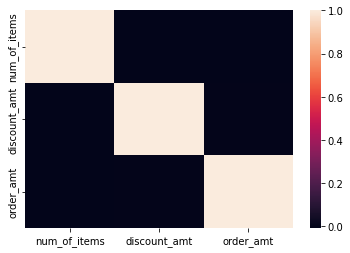

In [13]:
sns.heatmap(rt.corr())  #representing correaltion with heatmap

# 3. Data analysis

### 3.1. Transactions count by year/months


In [14]:
rt['month_year']=rt['transaction_date'].apply(lambda x: x.strftime('%Y-%m'))

In [15]:
items_sold= rt.groupby('month_year').sum()['num_of_items'].reset_index()
items_sold

,month_year,num_of_items
0,2019-10,107006
1,2019-11,104576
2,2019-12,113406
3,2020-01,106600
4,2020-02,102861
5,2020-03,109861
6,2020-04,104425
7,2020-05,109991
8,2020-06,104602
9,2020-07,109719


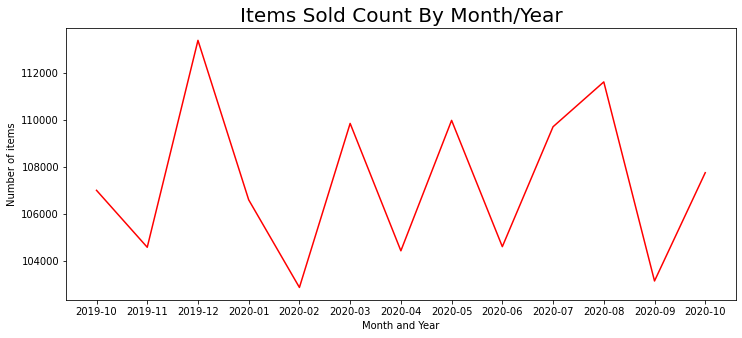

In [16]:
#plotting items sold count by month/year
plt.figure(figsize=(12,5))
plt.title("Items Sold Count By Month/Year",size=20)
plt.xlabel("Month and Year")
plt.ylabel("Number of items")

plt.plot(items_sold['month_year'],items_sold['num_of_items'],color='red')
plt.show()

### 3.2. Order amount by year/month

In [17]:
sales_by_my= rt.groupby('month_year').sum().reset_index()
sales_by_my

,month_year,num_of_items,discount_amt,order_amt
0,2019-10,107006,480.86,750063.34
1,2019-11,104576,471.10,725738.54
2,2019-12,113406,495.53,767506.37
3,2020-01,106600,468.12,742620.38
4,2020-02,102861,469.64,707427.85
5,2020-03,109861,492.17,756138.86
6,2020-04,104425,467.36,723120.60
7,2020-05,109991,511.26,766743.63
8,2020-06,104602,471.80,721433.03
9,2020-07,109719,480.60,766266.18


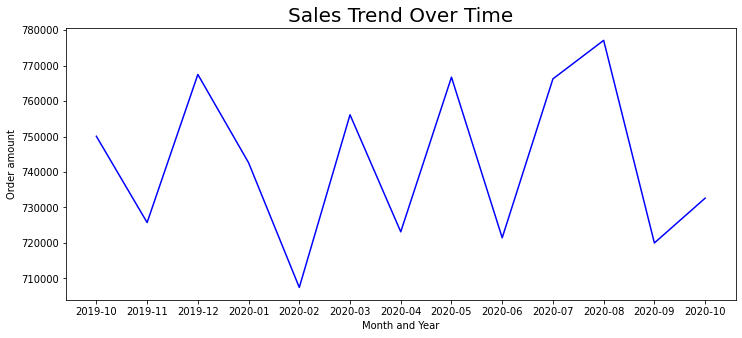

In [18]:
#plotting trends of transactions over period of time
plt.figure(figsize=(12,5))
plt.title("Sales Trend Over Time",size=20)
plt.xlabel("Month and Year")
plt.ylabel("Order amount")

plt.plot(sales_by_my['month_year'],sales_by_my['order_amt'],color='blue')
plt.show()

### 3.3. Items sold by hours

In [19]:
rt['transaction_hour']=rt['transaction_hour'].str.replace(" ","")

In [20]:
time=[]
for i in rt['transaction_hour']:
    j=dt.strptime(i,'%I:%M%p')
    time.append(dt.strftime(j,'%H'))

In [21]:
rt['hour']=time
rt['hour'].astype('int')

0        13
1        14
2        12
3        16
4        19
         ..
75615    17
75616    16
75617    15
75618    13
75619    11
Name: hour, Length: 75620, dtype: int32

In [22]:
itemssold_by_hours=rt.groupby('hour').sum()['num_of_items'].reset_index()
itemssold_by_hours

,hour,num_of_items
0,11,140421
1,12,140217
2,13,140758
3,14,139789
4,15,137786
5,16,140568
6,17,142713
7,18,136688
8,19,137568
9,20,139029


<AxesSubplot:xlabel='hour', ylabel='num_of_items'>

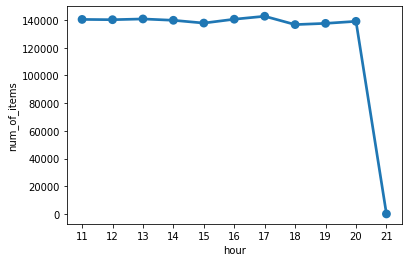

In [23]:
sns.pointplot(x=itemssold_by_hours['hour'],y=itemssold_by_hours['num_of_items'])

### 3.4 Sales by state

In [24]:
sales_state=rt.groupby('location_state').sum()['order_amt'].reset_index()

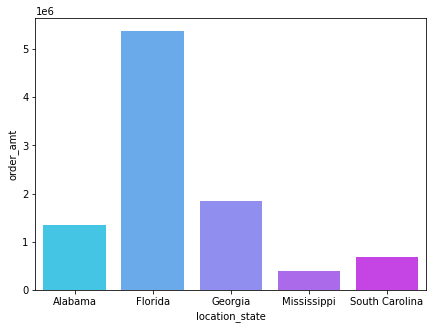

In [25]:
plt.figure(figsize=(7,5))
sns.barplot(x='location_state',y="order_amt",data=sales_state,palette='cool')
plt.show()

### 3.5 Top 10 cities with highest order amount

In [26]:
city_sales=rt.groupby(['location_state','location_city']).sum()['order_amt'].reset_index()
ten_cities=city_sales.sort_values(by='order_amt',ascending=False)[:10]

In [27]:
ten_cities

,location_state,location_city,order_amt
58,Georgia,Atlanta,833805.31
30,Florida,Miami,671208.66
1,Alabama,Birmingham,525501.30
35,Florida,Orlando,415605.32
50,Florida,Tampa,407783.97
23,Florida,Jacksonville,384569.13
16,Florida,Fort Lauderdale,305566.50
4,Alabama,Mobile,279333.01
5,Alabama,Montgomery,271968.12
38,Florida,Pensacola,243321.47


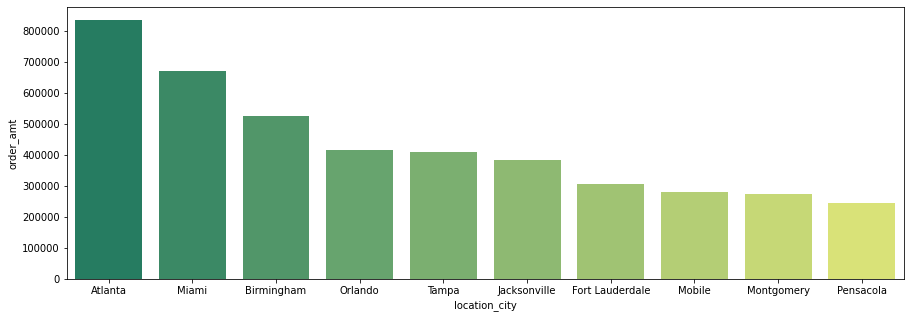

In [28]:
plt.figure(figsize=(15,5))
sns.barplot(x='location_city',y="order_amt",data=ten_cities,palette='summer')
plt.show()

### 3.6 Highest and lowest discounts given

In [29]:
discount=rt[['discount_amt']]
discount.dropna(how='any')


,discount_amt
1,0.33
3,0.25
8,0.17
9,0.36
10,0.42
...,...
75600,0.22
75601,0.16
75605,0.34
75610,0.14


In [30]:
high_discount=float(discount.max()*100)
low_discount=float(discount.min()*100)

In [31]:
print("Highest discount given is ",high_discount,"%")
print("Lowest discount given is ",low_discount,"%")

Highest discount given is  50.0 %
Lowest discount given is  10.0 %


### 3.7 During which month most of the transactions happen

In [32]:
rt['month']=rt['transaction_date'].apply(lambda x: x.strftime('%m'))

In [33]:
rt['month_name']=rt['transaction_date'].dt.month_name().str[:3]

In [34]:
count_by_month=rt.groupby(['month','month_name']).sum()['num_of_items'].reset_index()
count_by_month.sort_values(by='month')


,month,month_name,num_of_items
0,01,Jan,106600
1,02,Feb,102861
2,03,Mar,109861
3,04,Apr,104425
4,05,May,109991
5,06,Jun,104602
6,07,Jul,109719
7,08,Aug,111633
8,09,Sep,103137
9,10,Oct,214764


<AxesSubplot:xlabel='month_name', ylabel='num_of_items'>

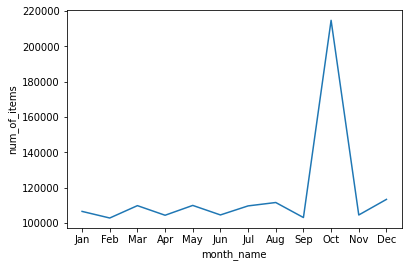

In [35]:
sns.lineplot(data=count_by_month,x='month_name',y='num_of_items')